In [132]:
####################################################################
###    This is the PYTHON version of program 2.2 from page 27 of   #
### "Modeling Infectious Disease in humans and animals"            #
### by Keeling & Rohani.										   #
###																   #
### It is the simple SIR epidemic with equal births and deaths.    #
####################################################################

In [133]:
import scipy.integrate as spi
import numpy as np
import pylab as pl

* mu is the per capita death rate, and the population level birth rate.
* beta is the transmission rate and incorporates the encounter rate between 
  susceptible and infectious individuals together with the probability of transmission.
* gamma is called the removal or recovery rate, though often we are more 
  interested in its reciprocal (1/γ) which determines the average infectious period.
* I0 is the initial proportion of the population that are infectious.
* S0 is the initial proportion of the population that are susceptible.


In [134]:
# set values to the parameters and initial states to S, I, R
mu=1/(70*365.0)
beta=520/365.0
gamma=1/7.0
TS=1.0 #time step
ND=70*365 #end date
R0 = beta/(gamma+mu)
S0=1/R0 #the endemic equilibrium
I0=1e-4
R0=1-S0-I0
INPUT = (S0, I0, R0)

In [135]:
def diff_eqs(INP,t):  
	'''The main set of equations'''
	Y=np.zeros((3))
	V = INP    
	Y[0] = mu - beta * V[0] * V[1] - mu * V[0]
	Y[1] = beta * V[0] * V[1] - gamma * V[1] - mu * V[1]
	Y[2] = gamma * V[1] - mu * V[2]
	return Y   # For odeint

In [136]:
t_start = 0.0; t_end = ND; t_inc = TS
t_range = np.arange(t_start, t_end+t_inc, t_inc)
RES = spi.odeint(diff_eqs,INPUT,t_range)

print(RES)

[[1.00302198e-01 1.00000000e-04 8.99597802e-01]
 [1.00323119e-01 1.00001490e-04 8.99576879e-01]
 [1.00344037e-01 1.00005961e-04 8.99555957e-01]
 ...
 [1.00277049e-01 2.46723339e-04 8.99476227e-01]
 [1.00277018e-01 2.46714484e-04 8.99476268e-01]
 [1.00276987e-01 2.46705619e-04 8.99476307e-01]]


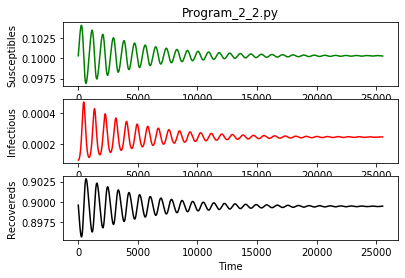

In [137]:
#Ploting
pl.subplot(311)
pl.plot(RES[:,0], '-g', label='Susceptibles')
pl.title('Program_2_2.py')
pl.xlabel('Time')
pl.ylabel('Susceptibles')
pl.subplot(312)
pl.plot(RES[:,1], '-r', label='Infectious')
pl.xlabel('Time')
pl.ylabel('Infectious')
pl.subplot(313)
pl.plot(RES[:,2], '-k', label='Recovereds')
pl.xlabel('Time')
pl.ylabel('Recovereds')
pl.show()